# Quick Code to Model Cases in Durham County
Case numbers downloaded from https://durhampublichealth-durhamnc.hub.arcgis.com/

I'm using the 7 day moving average to eliminate most of the noise

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit.models import LorentzianModel, GaussianModel


plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10)

In [40]:
df = pd.read_csv('Durham_County.csv', names = ['date', 'dateindex', 'cases'])
df.dropna(axis=0, inplace=True)



In [41]:
df.shape

(56, 3)

<AxesSubplot:xlabel='dateindex', ylabel='cases'>

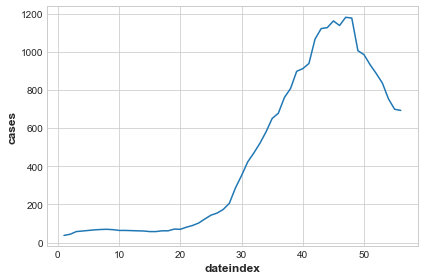

In [42]:
sns.lineplot(x='dateindex', y='cases', data=df)

In [53]:
cases_array = df['cases'].to_numpy()
dates_array = df['dateindex'].to_numpy()


model = GaussianModel()
params = model.guess(cases_array, x=dates_array)
params.add('amplitude',value=45000,min=1,max=100000)
params.add('center', value=45, min=30,max=60)
params.add('sigma', value=10.5, min=1,max=200)
##params.add('fwhm',min=1,max=100)
params.add('height',value = 30, min=0.5,max=500)

print(params)
result = model.fit(cases_array, params, x=dates_array)

Parameters([('amplitude', <Parameter 'amplitude', value=45000, bounds=[1:100000]>), ('center', <Parameter 'center', value=45, bounds=[30:60]>), ('sigma', <Parameter 'sigma', value=10.5, bounds=[1:200]>), ('fwhm', <Parameter 'fwhm', value=24.725610000000003, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', value=30, bounds=[0.5:500]>)])


<AxesSubplot:title={'center':'Model(gaussian)'}, xlabel='x', ylabel='y'>

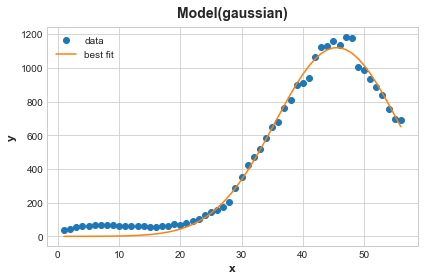

In [54]:
result.plot_fit()

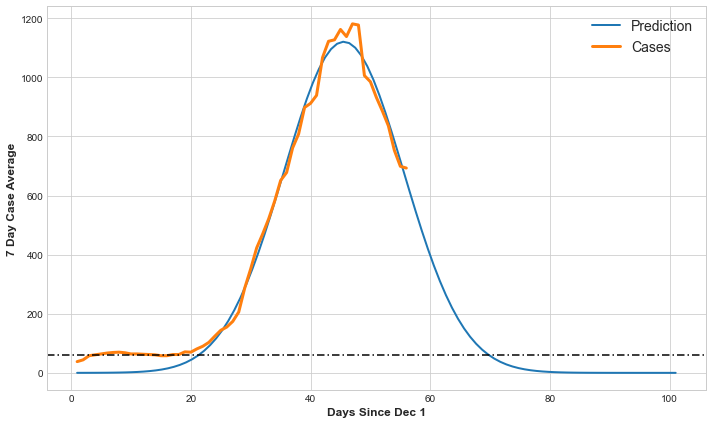

In [71]:
x_predict = np.linspace(1,101,num=100)

fit = result.eval(x=x_predict)

plt.figure(figsize=(10,6))
plt.plot(x_predict,fit,'-',linewidth=2,label='Prediction')
plt.plot(dates_array, cases_array,linewidth=3,label='Cases')
plt.axhline(y=60,color='k', dashes=(5,2,1,2))
plt.xlabel('Days Since Dec 1')
plt.ylabel('7 Day Case Average')
plt.legend(fontsize=14)